In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import cvxopt as opt # python version 3.6-3.10 가능
from cvxopt import solvers

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/User/github/Quant/data/kospi_category.csv", encoding='cp949')
start_date = '2004-01-01'
end_date = '2020-03-01'
 
df.index = pd.date_range(start_date,end_date,freq='m')
df.drop('date',axis=1, inplace=True)

In [4]:
prets = []     # 리스트 형태로 수익을 쌓을 장소
pvols = []     # 리스트 형태로 위험(표준편차)을 쌓을 장소

In [6]:
for p in range (3000):     # 3000회 반복
    weights = np.random.random(22)   # 랜덤한 22개의 숫자를 생성함(22개의 자산에 대응하는..)
    weights /= np.sum(weights)     # 22개의 숫자의 합계가 1이 되도록 조정함(각 자산의 비중)
    prets.append(np.sum(df.mean() * weights) * 12)    # 계산된 포트폴리오 수익을 prets에 저장
    covmat = df.cov() * 12     # cov matrix 만들기
    pvols.append(np.sqrt(weights.T @ covmat @ weights)) # 계산된 포트폴리오 위험을 pvols에 저장한다.

In [7]:
prets = np.array(prets)
pvols = np.array(pvols)

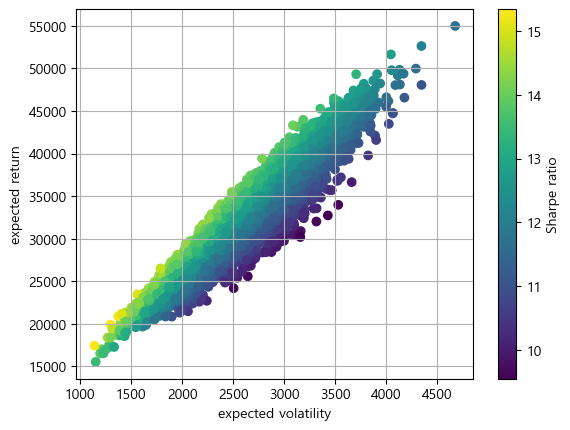

In [8]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

In [9]:
import scipy.optimize as sco

In [10]:
def minvar(weights):
    return np.sqrt(weights.T @ covmat @ weights)

In [21]:
def minvar(weights):
    return np.sqrt(weights.T @ covmat @ weights)

w = np.ones(22)
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = ((0,1), (0,1), (0,1), (0,1),(0,1), (0,1), (0,1), (0,1),(0,1), (0,1), (0,1), (0,1),(0,1), (0,1), (0,1), (0,1),(0,1),(0,1),(0,1), (0,1),(0,1),(0,1))

opt = sco.minimize(minvar, w, method='SLSQP', bounds=bnds, constraints=cons)

In [22]:
opt

     fun: 118.74081605200817
     jac: array([1228.52425671, 1345.23531151,  129.16952324,  164.14397335,
       1159.62406635, 4357.2973032 ,  647.39433956, 1683.74324989,
        570.13079166, 3843.01019287, 1076.94045734,  125.15271282,
        154.37700653,  456.36335468,  118.92367649,  719.05569649,
        118.4447794 ,  227.52889633,  118.6554203 , 1489.44329357,
       8446.79053688,  334.5083952 ])
 message: 'Positive directional derivative for linesearch'
    nfev: 238
     nit: 14
    njev: 10
  status: 8
 success: False
       x: array([5.67321647e-06, 3.79638213e-07, 3.36962329e-06, 2.80777386e-06,
       7.83179588e-06, 0.00000000e+00, 2.02138011e-07, 0.00000000e+00,
       0.00000000e+00, 2.82002357e-05, 2.15870598e-06, 1.02584732e-02,
       3.01561617e-06, 3.72357498e-07, 1.78148290e-01, 0.00000000e+00,
       7.58203425e-01, 2.25849418e-06, 5.33905627e-02, 0.00000000e+00,
       0.00000000e+00, 3.41174280e-06])

In [24]:
orets = np.sum(df.mean() * opt['x']) * 12
ovol = np.sqrt(opt['x'].T @ covmat @ opt['x'])

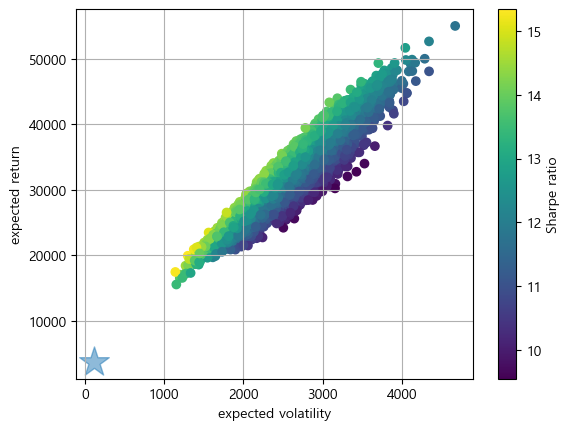

In [25]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

plt.scatter(ovol, orets, marker="*", s=500, alpha=0.5)
plt.show()